# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data loading and cleaning

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lych0508","key":"5f54b96168d9144d299bff41ce19ecea"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle


In [5]:
# Download a dataset from Kaggle
!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset --unzip -p /content/data



Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 13.5MB/s]


In [6]:
import os
print(os.listdir("/content/data"))


['test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv']


In [7]:

# Loading dataset
train = pd.read_csv('/content/data/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('/content/data/test_Y3wMUE5_7gLdaTN.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [8]:
train_original = train.copy()
test_original = test.copy()

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Exploratory Data Analysis¶

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

train['Credit_History'] = train['Credit_History'].astype('object')

In [14]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [15]:
#check for dulplicate data
train.duplicated().any()

False

In [16]:
# we will drop ID because it's not important for our model and it will just mislead the model

train.drop('Loan_ID', axis=1, inplace=True)

In [17]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


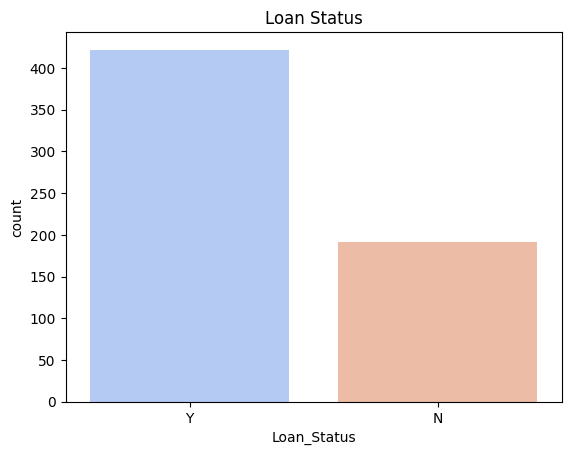

In [18]:
sns.countplot(data = train, x = 'Loan_Status', palette='coolwarm')
plt.title("Loan Status")
plt.show()

**The loan of 422(around 69%) people out of 614 was approved.**

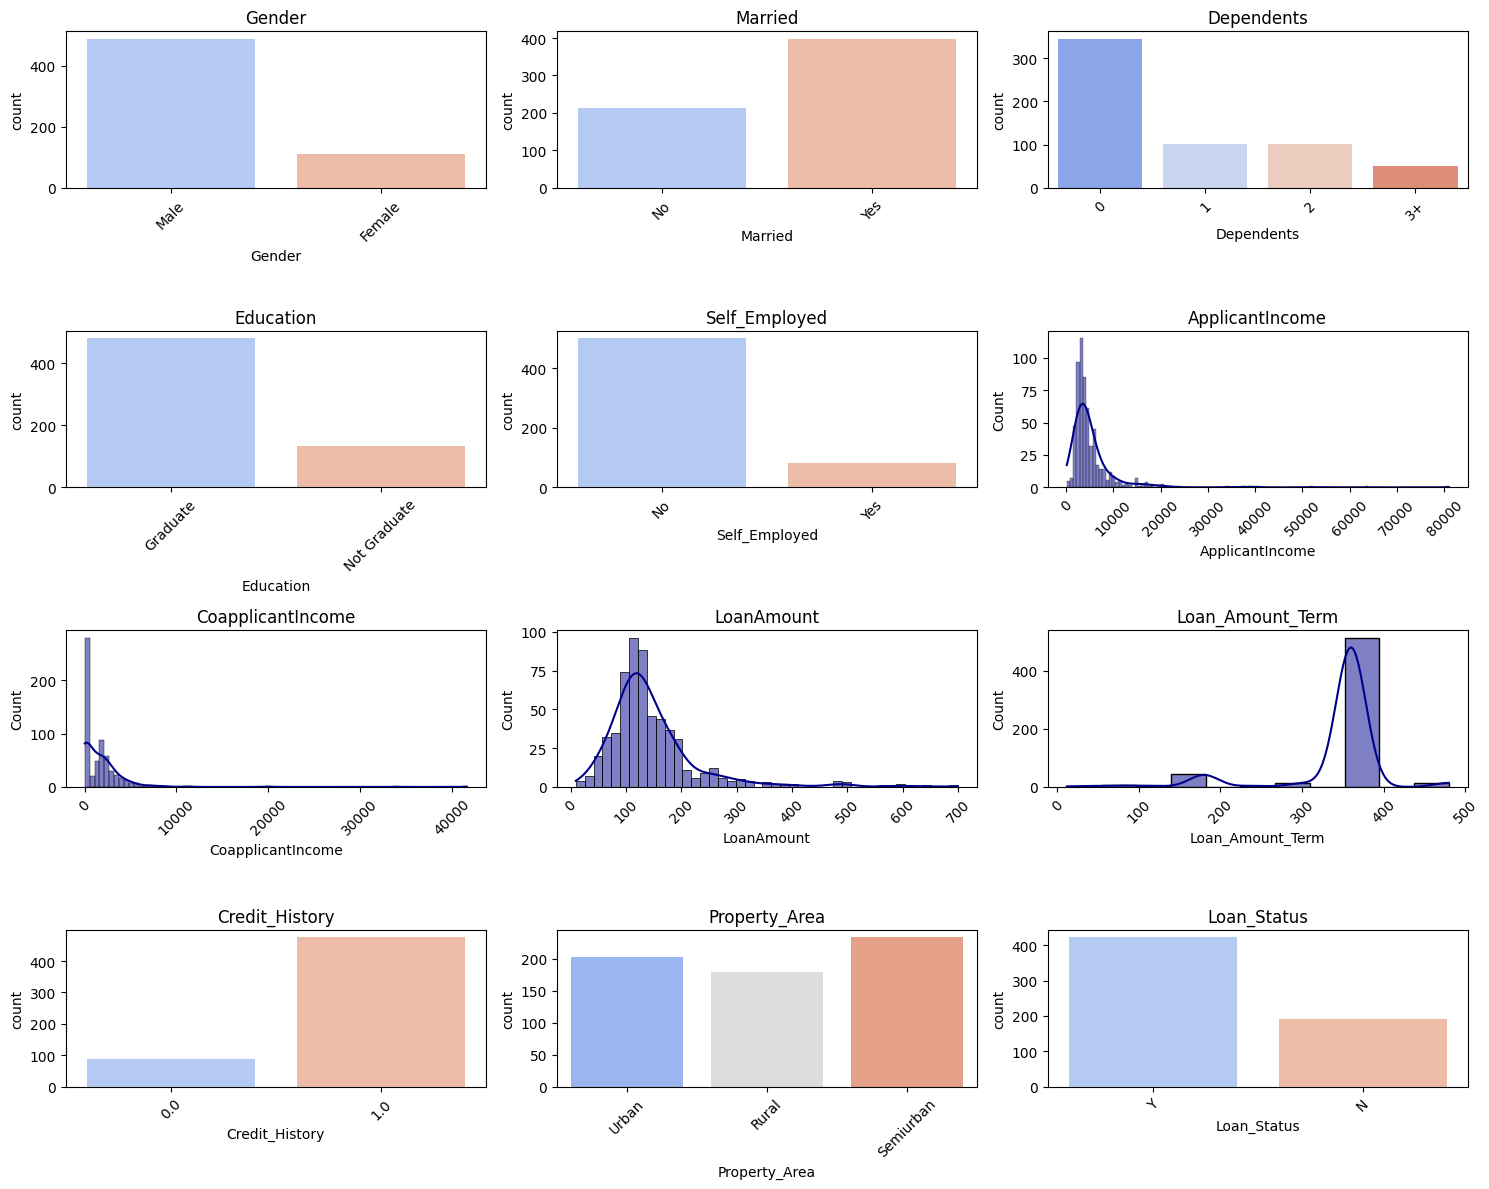

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(train.columns):
    if train[col].dtype == 'object':
        sns.countplot(x=train[col], ax=axes[i], palette="coolwarm")
    else:
        sns.histplot(train[col], kde=True, ax=axes[i], color="darkblue")

    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

# Data Cleaning - Checking and working with missing value

In [20]:
train.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [21]:
# We impute missing values with mean, mode, median.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [22]:
train.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [23]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [24]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [25]:
test.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


#Catergorical Data Analysis

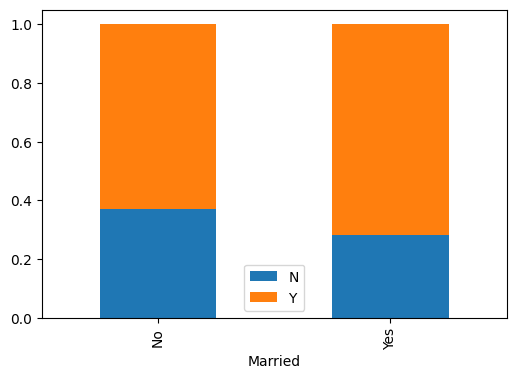

In [26]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

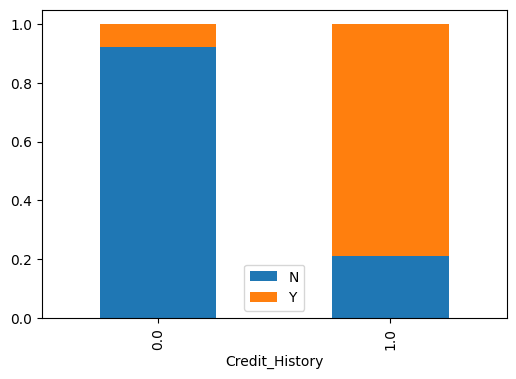

In [27]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

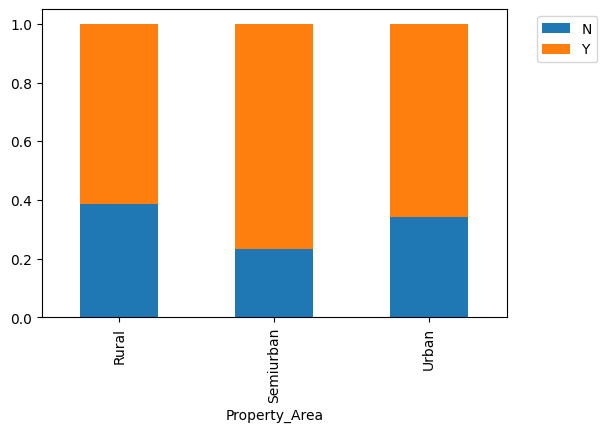

In [28]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

<Axes: xlabel='Dependents', ylabel='count'>

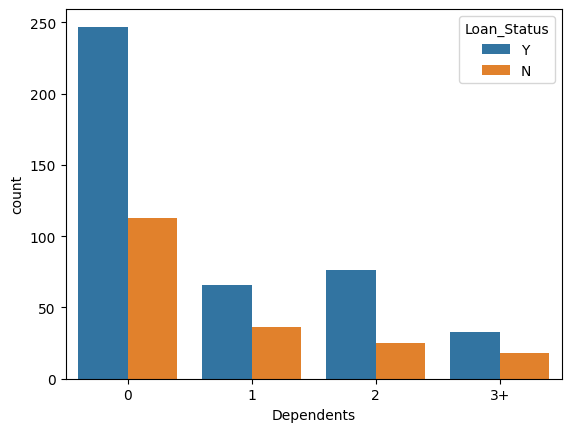

In [29]:
sns.countplot(x='Dependents', hue='Loan_Status', data=train)

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.
- if Dependents = 0 , we got higher chance to get a loan

#Numerical Data Analysis

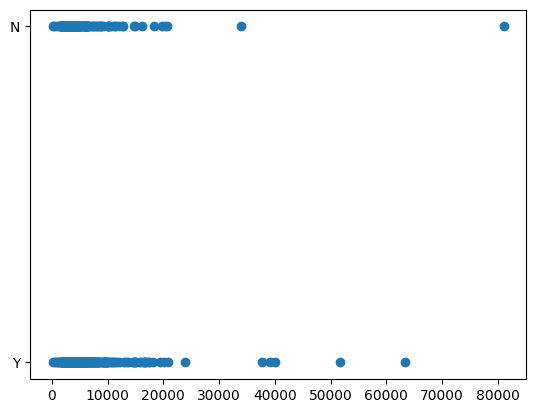

In [30]:
# ApplicantIncome

plt.scatter(train['ApplicantIncome'], train['Loan_Status']);

# No pattern

In [31]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


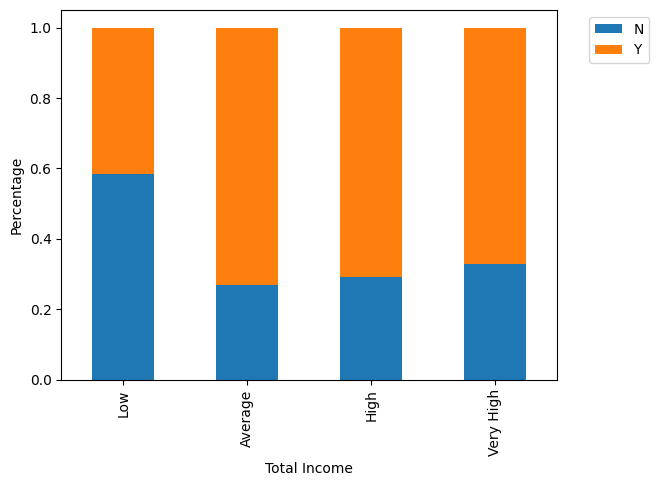

In [32]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

**Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.**

In [33]:
train = train.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [34]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

# Model Building

In [36]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [37]:
X = pd.get_dummies(X)
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)

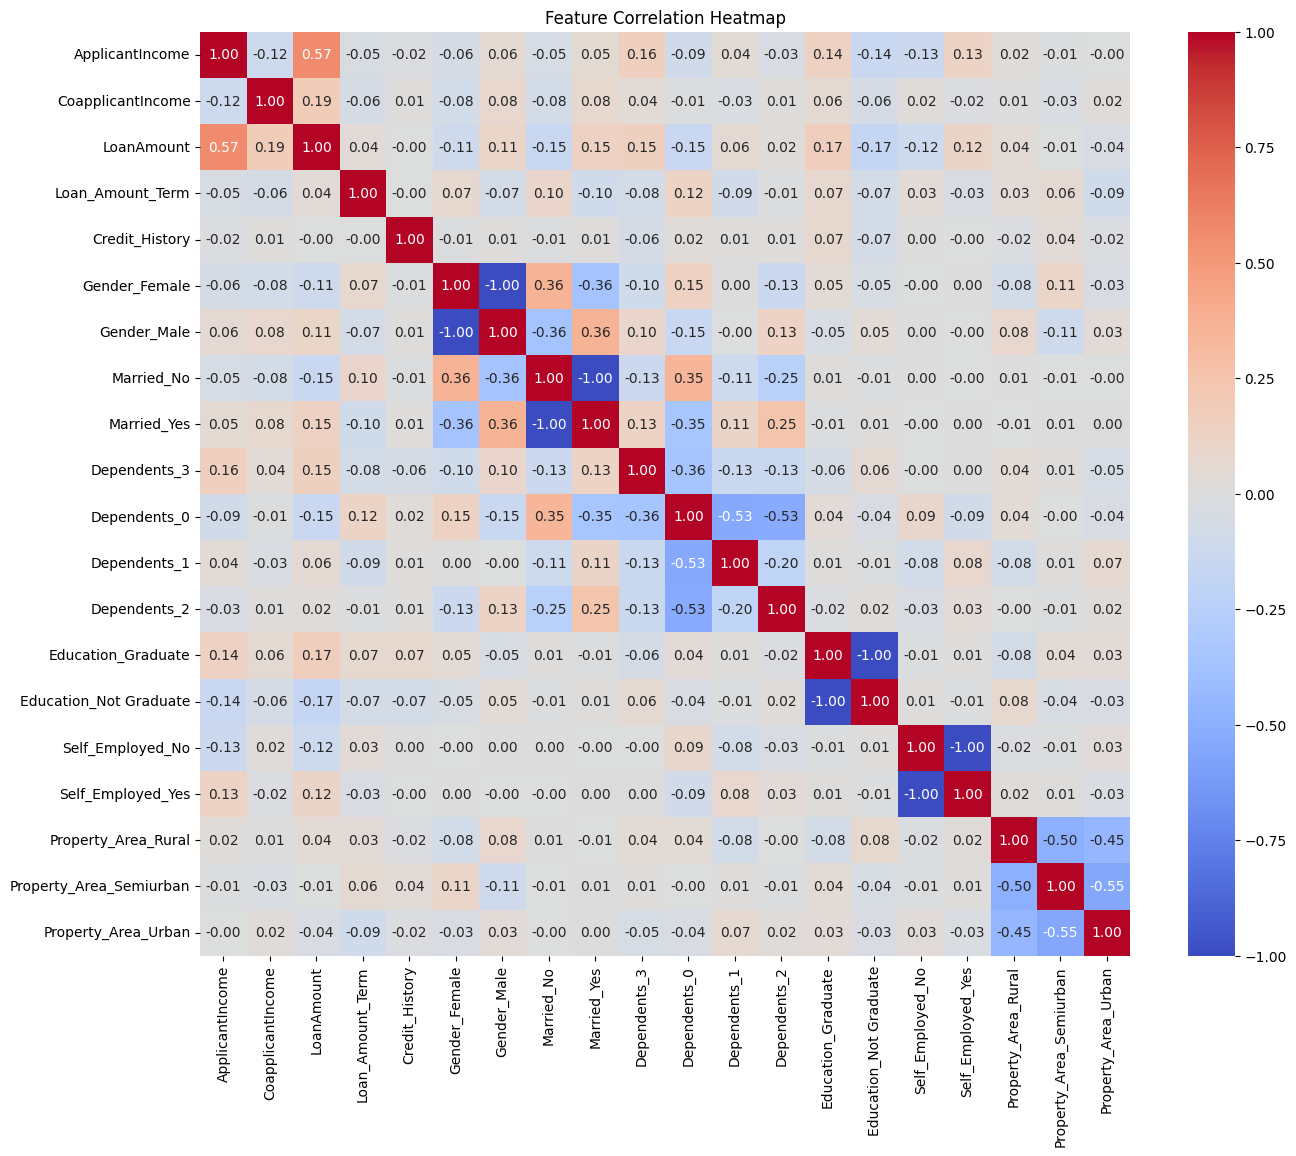

In [38]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Gender, marriage, graduation, self_employed are strong negative correlated**

In [39]:
# Remove Highly Correlated Features
# Define Threshold for High Correlation threshold < -0.9
X= X.drop(columns=['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_Yes'])
print(X.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_3  Dependents_0  \
0             1.0         True        False         False          True   
1             1.0         True         True         False         False   
2             1.0         True         True         False          True   
3             1.0         True         True         False          True   
4             1.0         True        False         False          True   

   Dependents_1  Dependents_2  Education_Graduate  Self_Employed_No  \
0         False         False                True  

In [40]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (429, 16)
y_train shape (429,)
X_test shape (185, 16)
y_test shape (185,)


In [41]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,True,False,False,True,False,False,True,True,False,False,True
1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,True,False,True,True,True,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,True,False,False,True,True,False,False,True


# Feature Selection

In [42]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=500)
}

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [44]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)

train_eval_train(models, X_train, y_train)
# we can see that best model is LogisticRegression at least for now, Random Forest is just memorizing the data so it is overfitting .


LogisticRegression :
  pre: 0.779
  rec: 0.980
  f1: 0.868
  loss: 7.394
  acc: 0.795
------------------------------
KNeighborsClassifier :
  pre: 0.751
  rec: 0.908
  f1: 0.822
  loss: 9.746
  acc: 0.730
------------------------------
DecisionTreeClassifier :
  pre: 0.775
  rec: 0.983
  f1: 0.867
  loss: 7.478
  acc: 0.793
------------------------------
RandomForestClassifier :
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
------------------------------


# Hyparameter Tuning

In [45]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)

train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
pre     0.774948
rec     0.972874
f1      0.862123
loss    7.731623
acc     0.785493
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.677695
rec      0.843908
f1       0.751171
loss    13.778814
acc      0.617719
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.777210
rec     0.983103
f1      0.867519
loss    7.478160
acc     0.792525
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
pre     0.777292
rec     0.914943
f1      0.839236
loss    8.657662
acc     0.759801
Name: 0, dtype: float64
------------------------------


#Feature Engineering

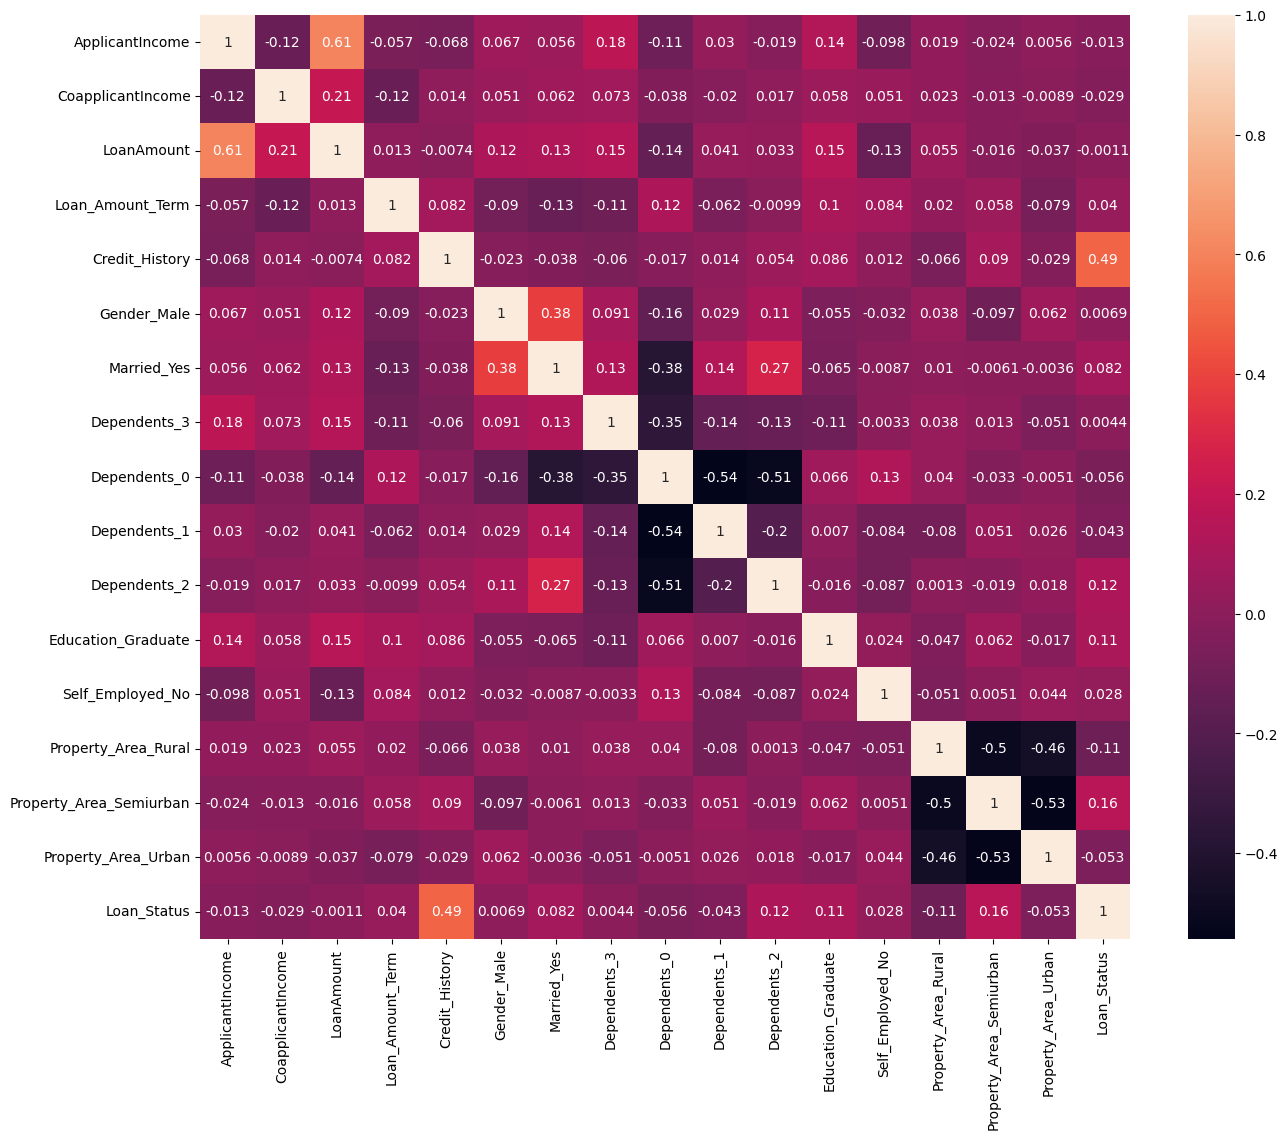

In [46]:
# that Credit_Histroy is the best good features  .

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True);

# here we got 61% similarity between LoanAmount & ApplicantIncome
# and that may be bad for our model so we will see what we can do





In [47]:
# I will try to make some operations on some features, here I just tried diffrent operations on diffrent features

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term']

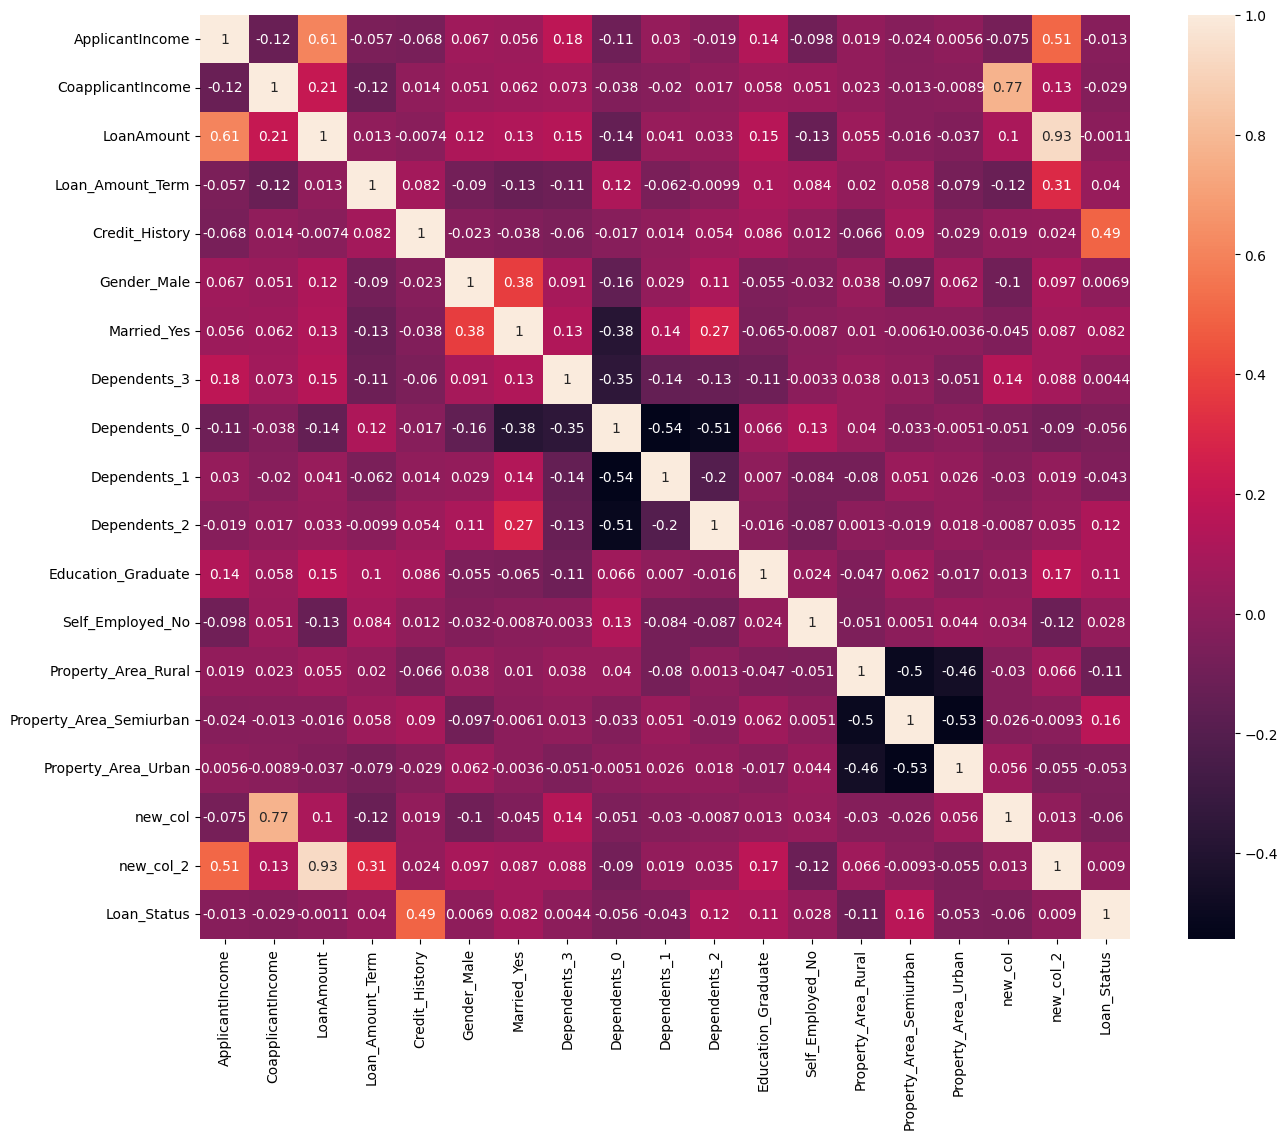

In [48]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True);

# new_col -0.06 , new_col_2, 0.009


In [49]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [50]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
pre     0.768729
rec     0.976092
f1      0.858970
loss    7.985086
acc     0.778461
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.685260
rec      0.833908
f1       0.751810
loss    13.611169
acc      0.622370
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.777210
rec     0.983103
f1      0.867519
loss    7.478160
acc     0.792525
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
pre     0.794149
rec     0.898736
f1      0.842073
loss    8.324368
acc     0.769048
Name: 0, dtype: float64
------------------------------


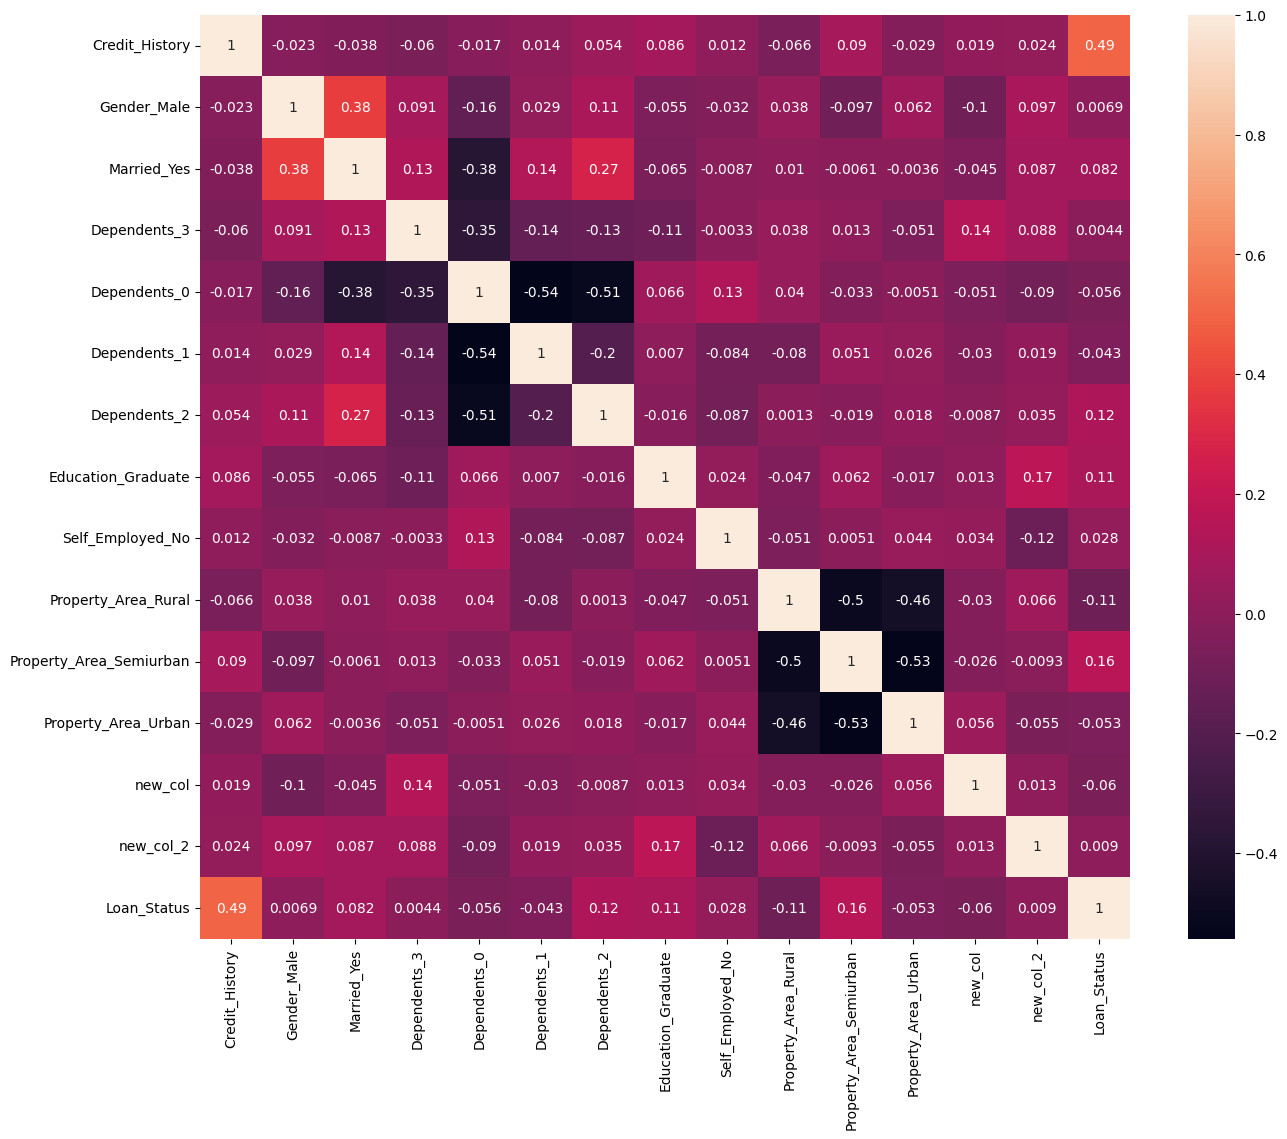

In [51]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True);

In [52]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

Credit_History
1.0    374
0.0     55
Name: count, dtype: int64
------------------------------------------------
Gender_Male
True     357
False     72
Name: count, dtype: int64
------------------------------------------------
Married_Yes
True     284
False    145
Name: count, dtype: int64
------------------------------------------------
Dependents_3
False    393
True      36
Name: count, dtype: int64
------------------------------------------------
Dependents_0
True     248
False    181
Name: count, dtype: int64
------------------------------------------------
Dependents_1
False    353
True      76
Name: count, dtype: int64
------------------------------------------------
Dependents_2
False    360
True      69
Name: count, dtype: int64
------------------------------------------------
Education_Graduate
True     336
False     93
Name: count, dtype: int64
------------------------------------------------
Self_Employed_No
True     371
False     58
Name: count, dtype: int64
-----------------

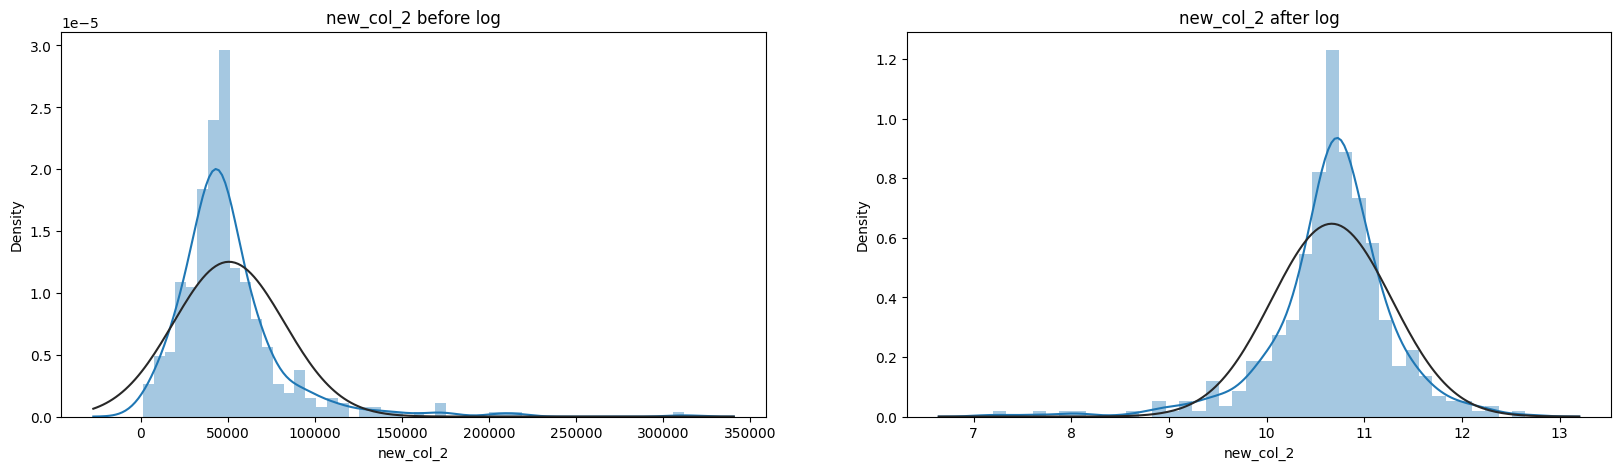

In [53]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');


In [54]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
pre     0.776575
rec     0.979655
f1      0.865740
loss    7.563978
acc     0.790144
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.729741
rec      0.904828
f1       0.807316
loss    10.675388
acc      0.703821
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.777210
rec     0.983103
f1      0.867519
loss    7.478160
acc     0.792525
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
pre     0.795838
rec     0.895402
f1      0.841452
loss    8.324368
acc     0.769048
Name: 0, dtype: float64
------------------------------


In [55]:
# new_col

# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
new_col
0.000000      190
1.240168        1
0.609299        1
0.662603        1
0.651584        1
             ... 
100.161058      1
0.255325        1
0.482495        1
0.723878        1
0.417955        1
Name: count, Length: 240, dtype: int64
--------------------------------------------------

after:
new_col
1.0    239
0.0    190
Name: count, dtype: int64


In [56]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
pre     0.776065
rec     0.976322
f1      0.864071
loss    7.645805
acc     0.787874
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre     0.736953
rec     0.928736
f1      0.821110
loss    9.998821
acc     0.722591
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.777210
rec     0.983103
f1      0.867519
loss    7.478160
acc     0.792525
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
pre     0.778699
rec     0.858161
f1      0.814482
loss    9.575717
acc     0.734330
Name: 0, dtype: float64
------------------------------


In [57]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

Credit_History
1.0    374
0.0     55
Name: count, dtype: int64
------------------------------------------------
Gender_Male
True     357
False     72
Name: count, dtype: int64
------------------------------------------------
Married_Yes
True     284
False    145
Name: count, dtype: int64
------------------------------------------------
Dependents_3
False    393
True      36
Name: count, dtype: int64
------------------------------------------------
Dependents_0
True     248
False    181
Name: count, dtype: int64
------------------------------------------------
Dependents_1
False    353
True      76
Name: count, dtype: int64
------------------------------------------------
Dependents_2
False    360
True      69
Name: count, dtype: int64
------------------------------------------------
Education_Graduate
True     336
False     93
Name: count, dtype: int64
------------------------------------------------
Self_Employed_No
True     371
False     58
Name: count, dtype: int64
-----------------

##Outlier

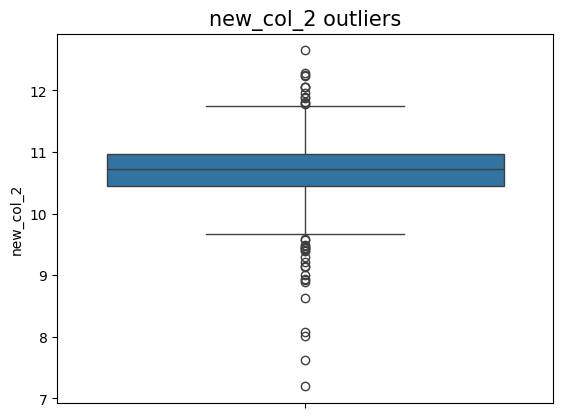

In [58]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [59]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .


new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.439980923050696 , Quartile 75: 10.961277846683982
iqr: 0.5212969236332867
Cut Off: 0.7819453854499301
Lower: 9.658035537600766
Upper: 11.743223232133913
Nubers of Outliers: 35
outliers:[12.65075846679162, 9.144200569471638, 12.254862809699606, 11.772208062900312, 11.889991098556695, 8.930626469173578, 9.137769679141348, 12.059890135352092, 8.881836305004146, 11.877568578558138, 9.483416292038601, 9.441452092939569, 9.587406005562649, 8.083328608786376, 12.231740392278752, 9.400630098419315, 12.059890135352092, 9.441452092939569, 11.96374627479919, 9.287301413112312, 9.392661928770137, 12.059890135352092, 9.21830854162536, 11.799607037088427, 8.626944055375356, 9.469622969906265, 9.578311275656766, 9.441452092939569, 8.99961934066053, 12.283033686666302, 11.81569317484005, 7.194436851100335, 8.006367567650246, 8.922658299524402, 7.620705086838262]

len X_train before dropping the outliers 429
len X_train before dropping the outliers 394


In [60]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

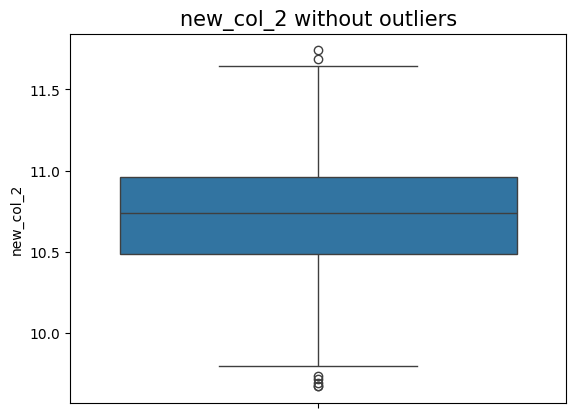

In [61]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

In [62]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
pre     0.778291
rec     0.970635
f1      0.863192
loss    7.682381
acc     0.786859
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.737925
rec      0.915476
f1       0.816443
loss    10.249336
acc      0.715641
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.780252
rec     0.981614
f1      0.868813
loss    7.407433
acc     0.794487
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
pre     0.791099
rec     0.842328
f1      0.812282
loss    9.600088
acc     0.733654
Name: 0, dtype: float64
------------------------------


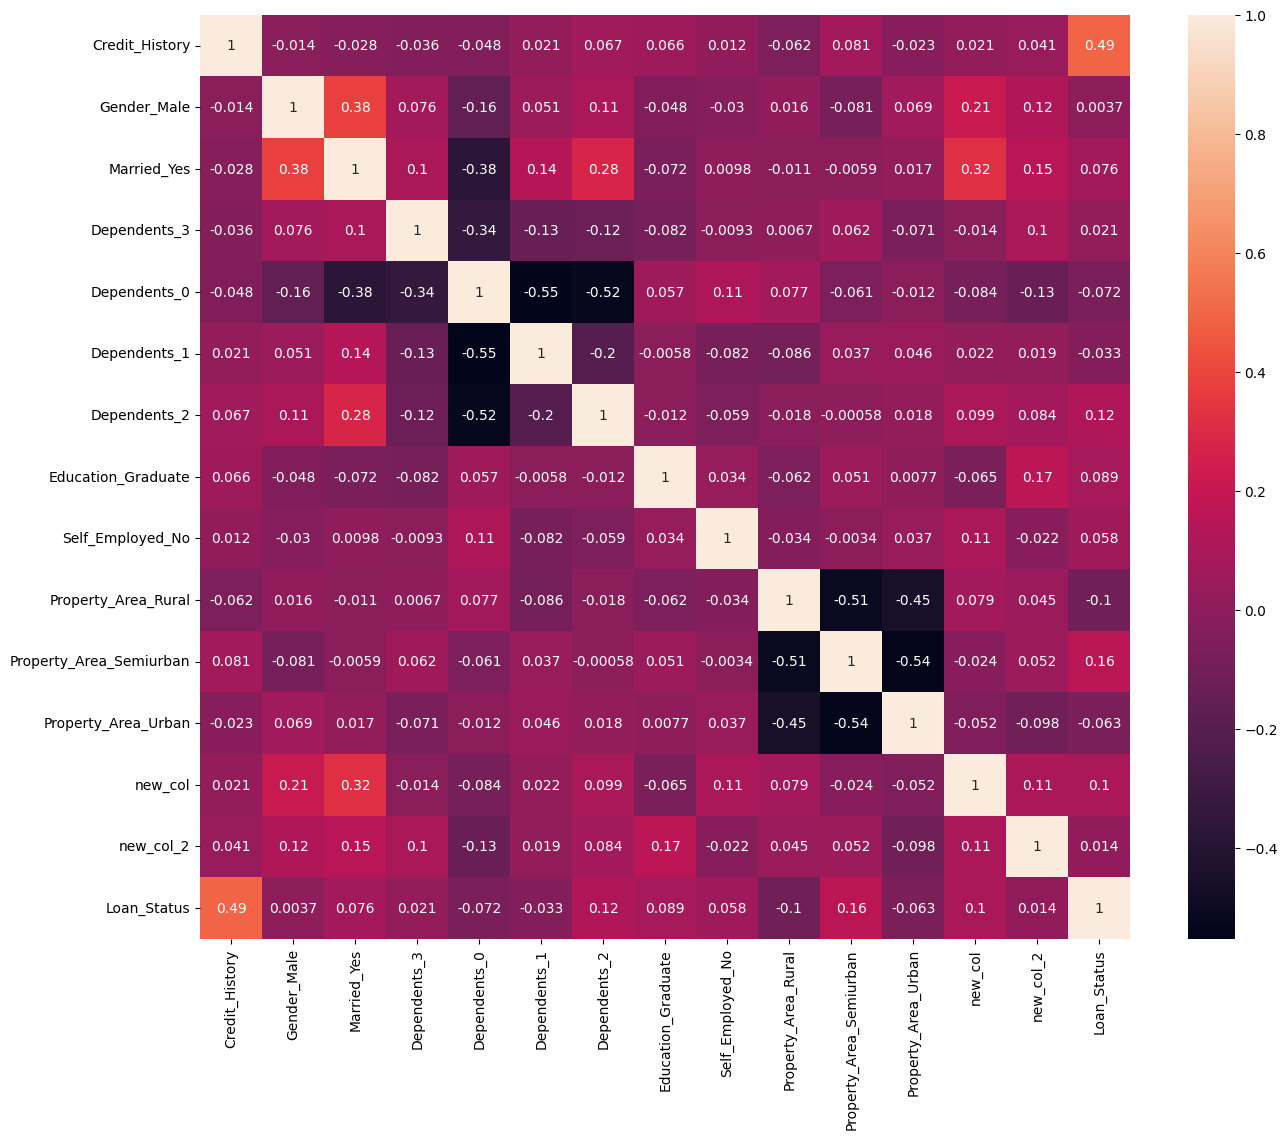

In [63]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True);

# Evaluate Model on Test Data

In [64]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
433,2425,2340.0,143.0,360.0,1.0,True,True,False,True,False,False,True,True,False,True,False
415,2995,0.0,60.0,360.0,1.0,False,False,False,True,False,False,True,True,False,False,True
144,11757,0.0,187.0,180.0,1.0,True,True,False,False,False,True,True,True,False,False,True
522,5677,1424.0,100.0,360.0,1.0,True,True,True,False,False,False,True,False,True,False,False
493,17263,0.0,225.0,360.0,1.0,False,False,False,True,False,False,False,False,False,True,False


In [65]:
X_test_new = X_test.copy()

In [66]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

#X_test_new.drop(['Gender_Male'], axis=1, inplace=True)

# drop all the features Except for Credit_History
#X_test_new.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

In [67]:
X_test_new.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,new_col,new_col_2
433,1.0,True,True,False,True,False,False,True,True,False,True,False,1.0,10.848949
415,1.0,False,False,False,True,False,False,True,True,False,False,True,0.0,9.980449
144,1.0,True,True,False,False,False,True,True,True,False,False,True,0.0,10.424065
522,1.0,True,True,True,False,False,False,True,False,True,False,False,1.0,10.491274
493,1.0,False,False,False,True,False,False,False,False,False,True,False,0.0,11.302204


In [68]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.833
  rec: 0.984
  f1: 0.903
  loss: 5.260
  acc: 0.854
----------------------------------------
KNeighborsClassifier:
  pre: 0.750
  rec: 0.945
  f1: 0.836
  loss: 9.157
  acc: 0.746
----------------------------------------
DecisionTreeClassifier:
  pre: 0.828
  rec: 0.984
  f1: 0.899
  loss: 5.455
  acc: 0.849
----------------------------------------
RandomForestClassifier:
  pre: 0.830
  rec: 0.882
  f1: 0.855
  loss: 7.404
  acc: 0.795
----------------------------------------


#Conclusion

Based on our analysis, we can see:


1.   Credit History is the most important feature
2.   Logistic Regression model is the more accurate model which accuracy is 85.4%

